In [19]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# package for gmm
from sklearn.mixture import GaussianMixture as GMM

%matplotlib inline
import matplotlib.pyplot as plt

# サンプルデータの作成

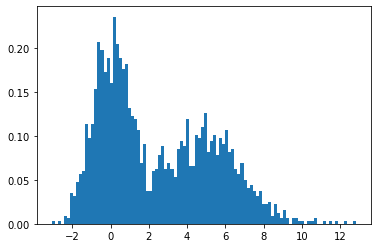

In [100]:
# ガウス分布の作成
y1 = np.random.normal(0, 1, 1000)  # 平均0，標準偏差1
y2 = np.random.normal(5, 2, 1000)  # 平均5，標準偏差2
y = np.concatenate((y1, y2))  # 混合分布の作成

# 混合分布の描画
plt.hist(y, density=True, bins=100);

# GMM によるクラスタリング

In [95]:
gmm = GMM(n_components=2, max_iter=1000, random_state=1234)
gmm.fit(y.reshape(-1,1))

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=1234, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

## クラスタリング結果の確認

In [96]:
weight = gmm.weights_ #重み（足すと1になる）
mean = gmm.means_ #平均
sd = np.sqrt(gmm.covariances_) #標準偏差
print(weight)
print(mean)
print(sd)

[0.48733674 0.51266326]
[[5.03694329]
 [0.03288939]]
[[[1.90003427]]

 [[1.01074556]]]


Text(0, 0.5, 'Probability Density')

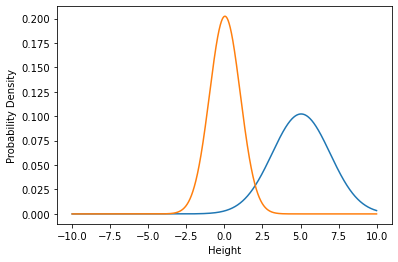

In [97]:
from scipy.stats import norm

x_ = np.arange(-10, 10, 0.01)
y1 = weight[0] * norm.pdf(x_, mean[0], sd[0])
y2 = weight[1] * norm.pdf(x_,mean[1], sd[1])

plt.plot(x_, y1.flatten())
plt.plot(x_, y2.flatten())
plt.xlabel("Height")
plt.ylabel("Probability Density")